In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_final.csv')

In [3]:
df.head()

,bookID,title,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language,author,genre,description
0,1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,652,2095690,27591,2006-09-16,Scholastic,English,J.K. Rowling,Fantasy,"It is the middle of the summer, but there is a..."
1,2,Harry Potter and the Order of the Phoenix (Har...,4.49,870,2153167,29221,2004-09-01,Scholastic,English,J.K. Rowling,Fantasy,Harry Potter is about to start his fifth year ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,4.42,352,6333,244,2003-11-01,Scholastic,English,J.K. Rowling,Fantasy,The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,435,2339585,36325,2004-05-01,Scholastic,English,J.K. Rowling,Fantasy,"Harry Potter, along with his best friends, Ron..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,2690,41428,164,2004-09-13,Scholastic,English,J.K. Rowling,Fantasy,Box Set containing Harry Potter and the Sorcer...


In [ ]:
# Checking counts and unique values in the target variable (genre).
pd.set_option('display.max_rows', None)
print(df["genre"].value_counts())
pd.set_option('display.max_rows', 25)

In [5]:
# Removing books without genre.
df = df[df["description"] != "blank"]
df = df[df["genre"] != "blank"]
# Removing NaN descriptions.
df = df[df["description"].notna()]

In [6]:
# 94 percent of the books are in English.
df["language"].value_counts()
# Filtering books only in English.
df = df[df["language"] == "English"]
df["language"].value_counts()

English    10039
Name: language, dtype: int64

In [7]:
# Only keep the required columns for the model. Call it df_m (dataFrame model).
df_m=df[["bookID","genre","description"]]
df_m

,bookID,genre,description
0,1,Fantasy,"It is the middle of the summer, but there is a..."
1,2,Fantasy,Harry Potter is about to start his fifth year ...
2,4,Fantasy,The Dursleys were so mean and hideous that sum...
3,5,Fantasy,"Harry Potter, along with his best friends, Ron..."
4,8,Fantasy,Box Set containing Harry Potter and the Sorcer...
...,...,...,...
11117,45630,Fiction,From the acclaimed author of The Rainbow Stori...
11118,45631,Fiction,William T. Vollmann is one of our greatest liv...
11119,45633,Fiction,"In the jungles of South America, on the ice fi..."
11120,45634,Historical Fiction,The time is the tenth century A.D. The newcome...


In [8]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10039 entries, 0 to 11121
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   bookID       10039 non-null  int64 
 1   genre        10039 non-null  object
 2   description  10039 non-null  object
dtypes: int64(1), object(2)
memory usage: 313.7+ KB


In [9]:
df_m['length'] = list(map(lambda x: len(str(x).split()), df_m['description']))

C:\Users\berka\AppData\Local\Temp\ipykernel_27828\4084948412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['length'] = list(map(lambda x: len(str(x).split()), df_m['description']))


In [10]:
df_m["length"].describe()

count    10039.000000
mean       134.939536
std         87.432690
min          1.000000
25%         75.500000
50%        120.000000
75%        172.000000
max       1289.000000
Name: length, dtype: float64

<AxesSubplot: xlabel='length', ylabel='Count'>

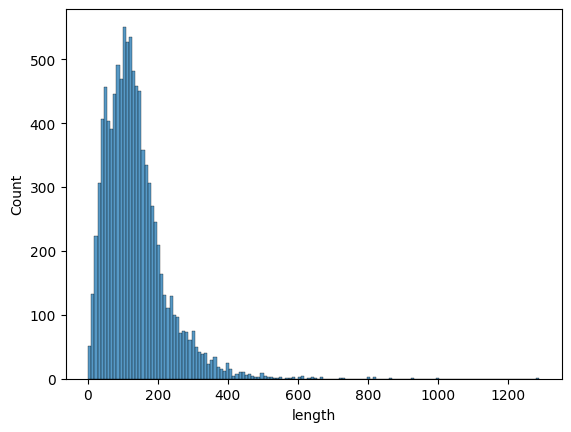

In [11]:
sns.histplot(x=df_m['length'])

In [12]:
# Checking if we are in need of filtering the descriptions by length.
df_m[df_m["length"] < 25]
# For now I keep all of them.
# Drop the length column because not needed anymore after filtering.
df_m.drop("length", axis=1)

,bookID,genre,description
0,1,Fantasy,"It is the middle of the summer, but there is a..."
1,2,Fantasy,Harry Potter is about to start his fifth year ...
2,4,Fantasy,The Dursleys were so mean and hideous that sum...
3,5,Fantasy,"Harry Potter, along with his best friends, Ron..."
4,8,Fantasy,Box Set containing Harry Potter and the Sorcer...
...,...,...,...
11117,45630,Fiction,From the acclaimed author of The Rainbow Stori...
11118,45631,Fiction,William T. Vollmann is one of our greatest liv...
11119,45633,Fiction,"In the jungles of South America, on the ice fi..."
11120,45634,Historical Fiction,The time is the tenth century A.D. The newcome...


### Merging reviews

In [13]:
import nltk
from sklearn.model_selection import train_test_split

In [14]:
descriptions = []
corpus=[]
for description in df_m['description']:
    descriptions.append(description)
    corpus.append(nltk.sent_tokenize(description))

In [268]:
# Sentences in all the reviews. But each review is in one list so we have to flatten it.
# corpus

In [16]:
# Reviews as strings.
# reviews

In [17]:
## flatten the list
corpus=[sent for sublist in corpus for sent in sublist]

### Text cleaning

In [18]:
import re
from bs4 import BeautifulSoup

In [19]:
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
    corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  ' '
    corpus[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus[i]) # Replace e-mails by ' '
    # Replace urls by ''
    corpus[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus[i]) 
    # Replace html tags by ''
    corpus[i] = BeautifulSoup(corpus[i], 'html.parser').get_text().strip()
    corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
    corpus[i] = re.sub(" ll ", "", corpus[i])

In [20]:
wordfreq = {}
for sentence in corpus:
    words = sentence.split()
    #tokens = nltk.word_tokenize(sentence) # To get the words, it can be also done with sentence.split()
    for word in words:
        if (word not in wordfreq.keys()): ## first time appearnce in the sentence
            wordfreq[word] = 1 # We initialize the corresponding counter
        else: ## if the world is already existed in the dictionalry 
            wordfreq[word] += 1 # We increase the corresponding counter

In [21]:
len(list(wordfreq.keys()))

54072

In [22]:
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english'))
# stop_words

In [23]:
# Cleaning the stopwords
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i])

#stop_words = [word for word in list(np.unique(stop_words)) if len(word) > 1]
#stop_words

In [24]:
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words]

In [25]:
# corpus

In [26]:
corpus.sort(reverse = True)
# corpus

In [27]:
len(corpus)

53922

In [224]:
corpus_freq = [(word[1],word[0]) for word in corpus[:5000]]
# corpus_freq

### Stemming

In [225]:
from nltk.stem import WordNetLemmatizer
#nltk.download('omw-1.4')
lem = WordNetLemmatizer()

corpus_freq = [(lem.lemmatize(word[0]),word[1]) for word in corpus_freq]

In [226]:
cols = {word[0]: [] for word in corpus_freq}
descriptions = pd.DataFrame(cols)

descriptions

,one,new,life,world,book,first,story,time,man,love,...,rumor,removed,reliable,refused,realization,ranma,ranger,quintessential,pushkin,profit


In [227]:
# list(cols.keys())

In [228]:
def review_inpector(sentence, stop_words, words):
    '''
    Function that takes a descriptions and returns a dictionary of word frequencies
    Inputs:
    sentence -> description: string
    stop_words -> list of stop_words
    words -> a list of words to count frequency 
    '''

    import re

    # Decompose the description in words -> tokens
    tokens = nltk.word_tokenize(sentence)
    # Cleanup the tokens
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        tokens[i] = re.sub(r'\W',' ',tokens[i]) # Replace everything non-alpahnumeric by ' '
        tokens[i] = re.sub(r'\s+','',tokens[i]) # Replace one or more whitespaces by  ' '
        tokens[i] = re.sub(r'\d+','',tokens[i]) # Replace one or more digits by  ' '
        tokens[i] = lem.lemmatize(tokens[i])
        
    # Droping tokens which are "stopwords" or empty
    tokens = [ token for token in tokens if (token not in stop_words and token != '')]

    # Initializing an empty dictionary of word frequencies for the corresponding description
    col_freq = {col:0 for col in words}
    
    # Filling the dictionary with word frequencies in the description
    for token in tokens:
        if token in words:
            col_freq[token] += 1

    return col_freq

In [229]:
my_list = list( map(review_inpector, df_m['description'], [stop_words]*df_m.shape[0], [list(cols.keys())]*df_m.shape[0] ) )

In [230]:
# my_list[:1]
# Validation
# When we compare this match with bookID=1 (Harry Potter and the Half-Blood Prince), the words are matching to the description.

In [231]:
len(my_list)

10039

In [232]:
descriptions = pd.DataFrame(my_list)

In [233]:
descriptions

,one,new,life,world,book,first,story,time,man,love,...,rumor,removed,reliable,refused,realization,ranma,ranger,quintessential,pushkin,profit
0,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10035,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10036,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
10037,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
descriptions['target_genre'] = df_m['genre'].reset_index(drop=True)

In [235]:
descriptions

,one,new,life,world,book,first,story,time,man,love,...,removed,reliable,refused,realization,ranma,ranger,quintessential,pushkin,profit,target_genre
0,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,Fiction
10035,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fiction
10036,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Fiction
10037,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Historical Fiction


### Calling genres that has less than 4 books "Other"

In [247]:
# Calling genres that has less than 4 books "Other"

descriptions = descriptions

# Count the number of rows for each genre
counts = descriptions['target_genre'].value_counts()

# Create a list of genre names with a count less than 3
other_genres = list(counts[counts < 4].index)

# Replace the genre names with "Other" for rows with those genre names
descriptions.loc[descriptions['target_genre'].isin(other_genres), 'target_genre'] = "Other"

descriptions["target_genre"].value_counts()

Fiction              1663
Classics              906
Nonfiction            760
Fantasy               732
Mystery               544
                     ... 
Pirates                 4
Alternate History       4
France                  4
Linguistics             4
Audiobook               4
Name: target_genre, Length: 105, dtype: int64

In [257]:
descriptions

,one,new,life,world,book,first,story,time,man,love,...,removed,reliable,refused,realization,ranma,ranger,quintessential,pushkin,profit,target_genre
0,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,Fiction
10035,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fiction
10036,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Fiction
10037,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Historical Fiction


# Defining a function to clean a review

In [299]:
def clean_review(x):
    x = str(x).lower().replace("\\","").replace("_"," ")
    x = re.sub(r'\W+',' ',x) # Replace everything non-alpahnumeric by ' '
    x = re.sub(r'\s+',' ',x) # Replace one or more whitespaces by  ' '
    x = re.sub(r'\d+',' ',x) # Replace one or more digits by  ' '
    x = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", x) # Replace e-mails by ''
    # Replace urls by ''
    x = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , x) 
    # Replace html tags by ''
    x = BeautifulSoup(x, 'html.parser').get_text().strip()
    x = x.replace(' br ',' ')

    return x

In [300]:
df_m.head()

,bookID,genre,description,length
0,1,Fantasy,"It is the middle of the summer, but there is a...",122
1,2,Fantasy,Harry Potter is about to start his fifth year ...,104
2,4,Fantasy,The Dursleys were so mean and hideous that sum...,157
3,5,Fantasy,"Harry Potter, along with his best friends, Ron...",78
4,8,Fantasy,Box Set containing Harry Potter and the Sorcer...,39


In [301]:
descriptions_cleaned = df_m.copy()

In [302]:
descriptions_cleaned = descriptions_cleaned[['description','genre']]

In [303]:
descriptions_cleaned['description'] = descriptions_cleaned['description'].apply(lambda x: clean_review(x))

In [304]:
descriptions_cleaned

,description,genre
0,it is the middle of the summer but there is an...,Fantasy
1,harry potter is about to start his fifth year ...,Fantasy
2,the dursleys were so mean and hideous that sum...,Fantasy
3,harry potter along with his best friends ron a...,Fantasy
4,box set containing harry potter and the sorcer...,Fantasy
...,...,...
11117,from the acclaimed author of the rainbow stori...,Fiction
11118,william t vollmann is one of our greatest livi...,Fiction
11119,in the jungles of south america on the ice fie...,Fiction
11120,the time is the tenth century a d the newcomer...,Historical Fiction


# TF-IDF 

In [305]:
from sklearn.feature_extraction.text import TfidfVectorizer

tidf = TfidfVectorizer(max_features = 20000, ngram_range = (1,2), analyzer = 'word', stop_words = stop_words)

In [306]:
X = tidf.fit_transform(descriptions_cleaned['genre'])
y = descriptions_cleaned["genre"]

In [307]:
tidf.get_feature_names()

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [308]:
len(tidf.get_feature_names())

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

### Filtering specific genres

### Filtering top 10 genres by value counts

In [ ]:
'''
filtered_genres = grouped[grouped > 3].index.to_list()
filtered_genres

# Filtering the data to keep only top 10 genres.
descriptions = descriptions[descriptions['target_genre'].isin(filtered_genres)]
# Checking the counts.
descriptions['target_genre'].value_counts()
'''

"\nfiltered_genres = grouped[grouped > 3].index.to_list()\nfiltered_genres\n\n# Filtering the data to keep only top 10 genres.\ndescriptions = descriptions[descriptions['target_genre'].isin(filtered_genres)]\n# Checking the counts.\ndescriptions['target_genre'].value_counts()\n"

### Filtering specific genres

### Filtering top 10 genres by value counts

In [ ]:
'''
filtered_genres = grouped[grouped > 3].index.to_list()
filtered_genres

# Filtering the data to keep only top 10 genres.
descriptions = descriptions[descriptions['target_genre'].isin(filtered_genres)]
# Checking the counts.
descriptions['target_genre'].value_counts()
'''

"\nfiltered_genres = grouped[grouped > 3].index.to_list()\nfiltered_genres\n\n# Filtering the data to keep only top 10 genres.\ndescriptions = descriptions[descriptions['target_genre'].isin(filtered_genres)]\n# Checking the counts.\ndescriptions['target_genre'].value_counts()\n"

### Inspecting the number of genres

<AxesSubplot: xlabel='target_genre', ylabel='count'>

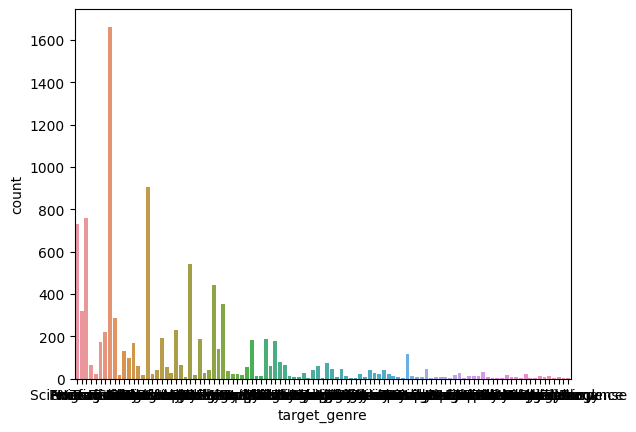

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(x=descriptions['target_genre'])

### X y split

In [250]:
X = descriptions.drop(columns='target_genre')
y = descriptions['target_genre']

# Train test split

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Target class balancing, NOT IMPLEMENTED

In [252]:
# Not implemented.

# Naive Bayes Classification

In [253]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [254]:
# Prediction
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [255]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [256]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_train_pred),
                                         precision_score(y_train, y_train_pred, average='macro'),
                                         recall_score(y_train, y_train_pred, average='macro')],
                               'Test': [accuracy_score(y_test, y_test_pred),
                                        precision_score(y_test, y_test_pred, average='macro'),
                                        recall_score(y_test, y_test_pred, average='macro')]})

performance_log

C:\Users\berka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\berka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.791309,0.501494
1,Precision,0.872449,0.290598
2,Recall,0.676682,0.223025


In [246]:
xtest123 = X_test[0:10]
ytest123 = y_test[0:10]

# Predict Output
predicted = model.predict(xtest123)

print("Actual Value:", ytest123)
print("Predicted Value:", predicted[0:10])

Actual Value: 7360       Spirituality
2184         Nonfiction
8218          Star Wars
6160         Nonfiction
9082    Science Fiction
8871           Vampires
7684           Classics
761          Philosophy
7020            Fiction
7627             Horror
Name: target_genre, dtype: object
Predicted Value: ['Nonfiction' 'Nonfiction' 'Star Wars' 'Nonfiction' 'Science Fiction'
 'Romance' 'Fiction' 'Philosophy' 'Classics' 'Mystery']
